# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries

import pandas as pd
import numpy as np


# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [7]:
# your code here

df = pd.read_csv('Employee.csv')
df

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [4]:
# Method 1
# your code here

salary_dep = df.groupby('Department')['Salary'].mean()
salary_dep

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [12]:
# Method 2
# your code here
salary_dep  = pd.pivot_table(df, values='Salary', index='Department', aggfunc='mean')

salary_dep 


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [16]:
# your code here

salary_title_dep  = pd.pivot_table(df, values='Salary', index='Department',columns='Title',aggfunc='mean')

salary_title_dep


Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,NaN
IT,70.0,32.5,60.0
Sales,NaN,NaN,55.0


#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [17]:
# your code here

salary_title  = pd.pivot_table(df, values='Salary', index='Department',columns=['Title','Years'],aggfunc='mean')

salary_title



Title         VP analyst             associate            
Years          8       1     2     4         2     3     7
Department                                                
HR          70.0     NaN  30.0  35.0       NaN   NaN   NaN
IT          70.0    35.0  30.0   NaN       NaN   NaN  60.0
Sales        NaN     NaN   NaN   NaN      55.0  55.0   NaN

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [20]:
# your code here

salary_nb_emp  = pd.pivot_table(df, values='Salary', index=['Department', 'Title'], aggfunc={'Salary': ['mean', 'count']})
salary_nb_emp



count  mean
Department Title                 
HR         VP             1  70.0
           analyst        2  32.5
IT         VP             1  70.0
           analyst        2  32.5
           associate      1  60.0
Sales      associate      2  55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [25]:
# your code here*

describe = pd.pivot_table(df, values='Salary', index=['Department', 'Title'], aggfunc={'Salary': ['mean', 'max','min','std',]})

describe

max  mean  min       std
Department Title                              
HR         VP          70  70.0   70       NaN
           analyst     35  32.5   30  3.535534
IT         VP          70  70.0   70       NaN
           analyst     35  32.5   30  3.535534
           associate   60  60.0   60       NaN
Sales      associate   55  55.0   55  0.000000

In [ ]:
"""
your commments here

The salary depending on the title does not differ too much from one sector to another. 

The only job title where we can detect variations in salary levels is that of analyst. 



"""

#### Based on your comments, fill the missing values with an appropriate value.

In [26]:
# your code here

describe = pd.pivot_table(df, values='Salary', index=['Department', 'Title'], aggfunc={'Salary': ['mean', 'max','min','std',]},fill_value=0)

describe

max  mean  min       std
Department Title                              
HR         VP          70  70.0   70  0.000000
           analyst     35  32.5   30  3.535534
IT         VP          70  70.0   70  0.000000
           analyst     35  32.5   30  3.535534
           associate   60  60.0   60  0.000000
Sales      associate   55  55.0   55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [27]:
# your code here

sth = pd.pivot_table(df, values='Salary', index=['Department'], aggfunc={'Salary': ['mean', 'count']},fill_value=0)

sth 

# we can't really know the cost of each salaries because we have to include taxes and other cost from the compagny !



,count,mean
Department,,
HR,3,45.00
IT,4,48.75
Sales,2,55.00


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [29]:
# your code here

xp = pd.pivot_table(df, values=['Salary','Years'], index=['Department', 'Title'], aggfunc={'Salary': 'mean', 'Years':'sum' },fill_value=0)



xp



Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here





# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [32]:
# your code here

fitbit = pd.read_csv('Fitbit.csv')

fitbit



,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [36]:
# your code here

fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [42]:
# your code here

corr= fitbit['Steps'].corr(fitbit['Minutes Very Active'])

corr




0.5714518481062612

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [43]:
import matplotlib.pyplot as plt

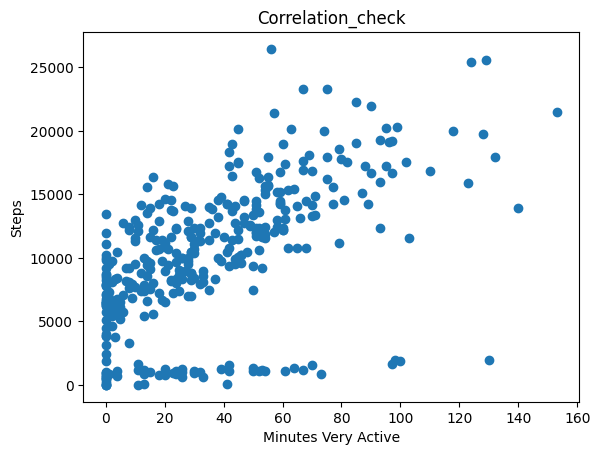

La correlation est de: 0.5714518481062612


In [55]:
x = [i for i in df['Minutes Very Active']]
y = [i for i in df['Steps']]
plt.scatter(x, y)
plt.title('Correlation_check')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()
corr= fitbit['Steps'].corr(fitbit['Minutes Very Active'])

print("La correlation est de:", corr)





#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
your commments here

There is a small  correlation between these both but they are'nt dependantes
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [57]:
# your code here

corr= fitbit['Steps'].corr(fitbit['Minutes Sedentary'])

print("La correlation est de:", corr)


La correlation est de: 0.07690608062990098


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

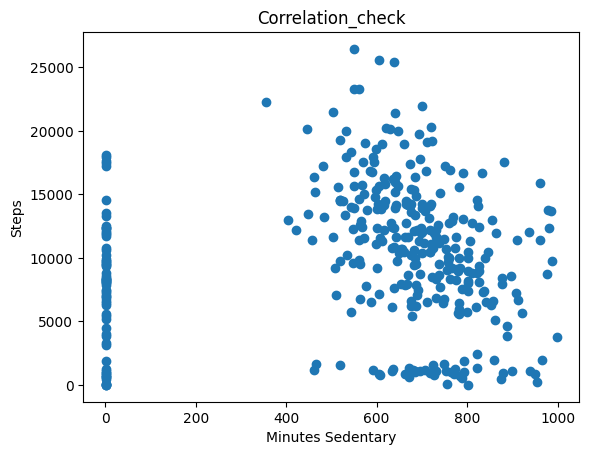

La correlation est de: 0.07690608062990098


In [58]:
# your code here

x = [i for i in df['Minutes Sedentary']]
y = [i for i in df['Steps']]
plt.scatter(x, y)
plt.title('Correlation_check')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()
corr= fitbit['Steps'].corr(fitbit['Minutes Sedentary'])

print("La correlation est de:", corr)



In [ ]:
"""
your commments here

there'isn't correlation between this both set. 
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [62]:
# your code here

corr= fitbit['Steps'].corr(fitbit['MinutesOfSleep'])

print("La correlation est de:", corr)


La correlation est de: 0.1309856595083637


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

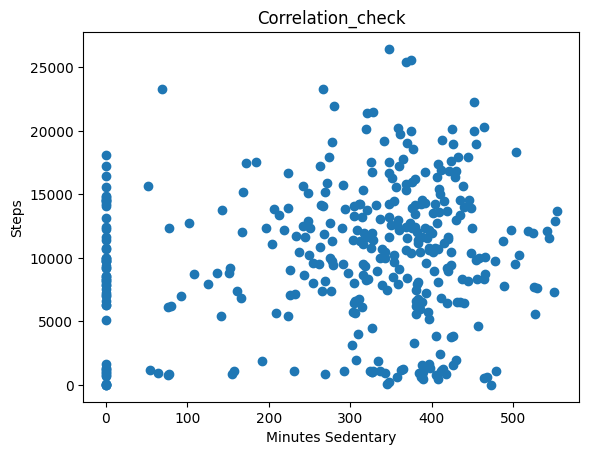

La correlation est de: 0.1309856595083637


In [61]:
# your code here

x = [i for i in df['MinutesOfSleep']]
y = [i for i in df['Steps']]
plt.scatter(x, y)
plt.title('Correlation_check')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()
corr= fitbit['Steps'].corr(fitbit['MinutesOfSleep'])

print("La correlation est de:", corr)


In [ ]:
"""
your commments here

there'isn't correlation between this both set. 

"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [ ]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']



In [63]:
# your code here

subset = fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']]

subset.corr()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [68]:
# your code here

subset.corr().sort_values(by = 'Steps',ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [72]:
# your code here

time_grades = pd.read_csv('Time_Grades.csv')
time_grades



,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


Show visually the frequency distribution of the time_grades dataset.

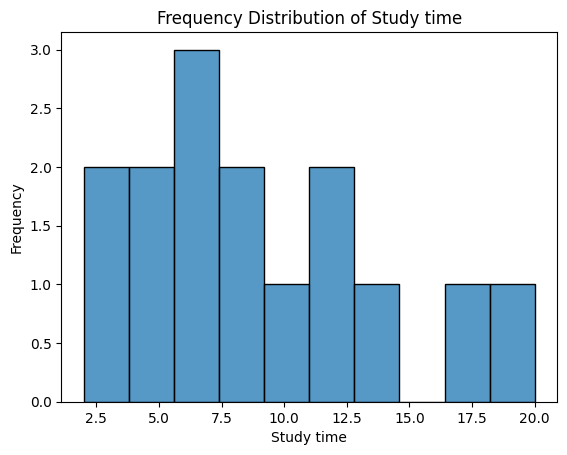

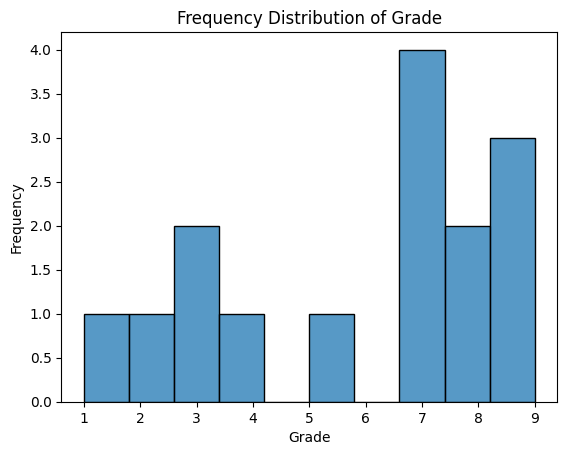

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

     
sns.histplot(time_grades['Study time'], kde=False, bins=10)  

plt.xlabel('Study time')
plt.ylabel('Frequency')
plt.title(f'Frequency Distribution of Study time')
plt.show()

sns.histplot(time_grades['Grade'], kde=False, bins=10)  
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title(f'Frequency Distribution of Grade')
plt.show()



#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [119]:
# your code here


from scipy.stats import spearmanr

corr_pearson = time_grades['Study time'].corr( time_grades['Grade'])



X =  time_grades['Study time']
Y = time_grades['Grade']


corr_spearman, p_value = spearmanr(X, Y)



print("corr.sperman = ",corr_spearman,",corr.pearson = ", corr_pearson )

print(p_value)






corr.sperman =  0.819658753036942 ,corr.pearson =  0.7980456073578858
0.00018377469445788485


In [ ]:
"""
your commments here

There is a very strong correlation between these two columns. the correlation is statistically significant !
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

corr.sperman =  0.819658753036942 ,corr.pearson =  0.7980456073578858
0.00018377469445788485


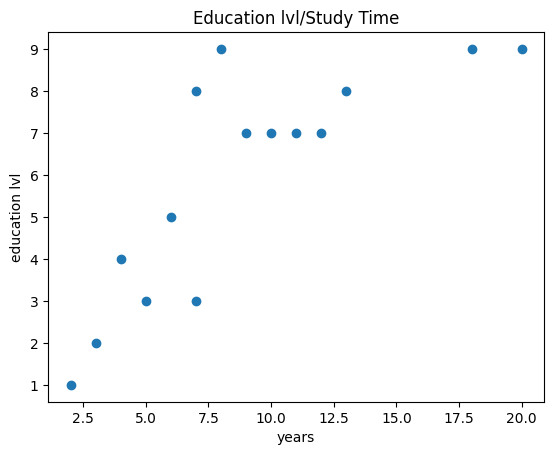

In [122]:
# your code here

plt.scatter(time_grades['Study time'], time_grades['Grade'])

plt.xlabel('years')
plt.ylabel('education lvl')
plt.title('Education lvl/Study Time')



print("corr.sperman = ",corr_spearman,",corr.pearson = ", corr_pearson )
print(p_value)
plt.show()

In [ ]:
"""
your commments here

With the exception of 2 cases, we can say that there is a direct correlation between the level of education and the number of years of study. 
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
Pearson correlation is used to assess the linear correlation between two continuous variables, while Spearman correlation is used to assess the monotonic correlation between two variables, whether continuous or ordinal. 
The Spearman correlation is more appropriate when the relationship between the variables is not linear or when the data contains outliers.
"""